## **Fashion-MNIST clothing image classification**

### **1. Import libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
import pandas as pd
import matplotlib.pyplot as plt

### **2. Load the dataset**

In [2]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()
print('train_x :', train_x.shape, train_x.ndim, type(train_x))
print('test_x :', test_x.shape, test_x.ndim, type(test_x))

11501568/11490434 [==============================] - 0s 0us/step
train_x : (60000, 28, 28) 3 <class 'numpy.ndarray'>
test_x : (10000, 28, 28) 3 <class 'numpy.ndarray'>


### **3. Explore the data**

In [3]:
class_name = list(set(train_y))
print('class_name :', class_name)

class_name : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


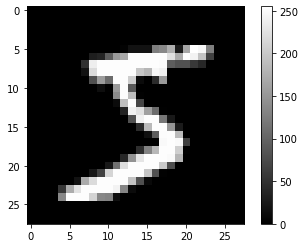

label : 5


In [4]:
plt.imshow(train_x[0])
plt.colorbar()
plt.gray()
plt.show()
print('label :', train_y[0])

In [5]:
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))
print('train_x :', train_x.ndim, type(train_x))
print('test_x :', test_x.ndim, type(test_x))

train_x : 4 <class 'numpy.ndarray'>
test_x : 4 <class 'numpy.ndarray'>


### **4. Preprocess the data**

In [6]:
print('before scaling :', train_x[0][10].max())

before scaling : 253


In [7]:
train_x = train_x / 255.0
test_x = test_x / 255.0

In [8]:
print('after scaling :', train_x[0][10].max())

after scaling : 0.9921568627450981


### **5. Build/Compile/Train the model**

In [9]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),                           
                             tf.keras.layers.MaxPooling2D((2, 2)),
                             tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),                            
                             tf.keras.layers.MaxPooling2D((2, 2)),
                             tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),                            
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 3ms/step - loss: 0.1318 - accuracy: 0.9594
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0422 - accuracy: 0.9863
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0289 - accuracy: 0.9907
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0207 - accuracy: 0.9936
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0176 - accuracy: 0.9946
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0128 - accuracy: 0.9961
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0116 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0100 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0080 - accuracy: 0.9974
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

### **6. Evaluate the model**

In [12]:
model.evaluate(test_x, test_y, verbose=2)

313/313 - 1s - loss: 0.0336 - accuracy: 0.9917 - 806ms/epoch - 3ms/step


[0.03357427567243576, 0.9916999936103821]